In [1]:
# EDA pamages 
import pandas as pd

#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\haier\\Python\\TEXT_DATA_PREPROCESSING\\Data_sets\\subset_covid19_tweets.csv")

In [3]:
drop_unnamed = df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.index.name = 'S:no'  ; df.columns.name = 'Info'
df_rename = df.rename(columns=str.title)
fill_with_method = df.fillna(method='ffill',inplace=True) #this method keep pervious of column-value and past where na is writhen  

In [5]:
fill_with_values = df.fillna({'hashtags':'Zero'},inplace=True)

In [6]:
def get_convert_dtype(list_of_c_ids):
    for list_of_c_id in list_of_c_ids:
        df[list_of_c_id] = df[list_of_c_id].apply(pd.to_numeric)
        # convert just columns "a" and "b" df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
        df[list_of_c_id] = df[list_of_c_id].astype(int)
get_convert_dtype(['user_followers', 'user_friends', 'user_favourites'])

In [12]:
get_convert_dtype(['user_followers', 'user_friends', 'user_favourites'])

In [7]:
df.dtypes

Info
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int32
user_friends         int32
user_favourites      int32
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [8]:
data = df.describe()

In [9]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(1,2,1)
        #histogram
        sns.distplot(df[list_var])

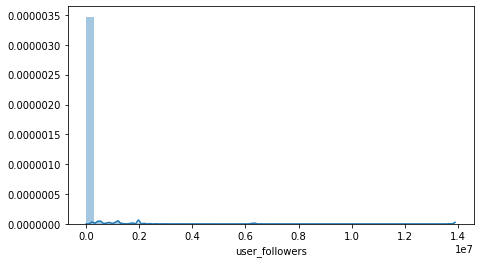

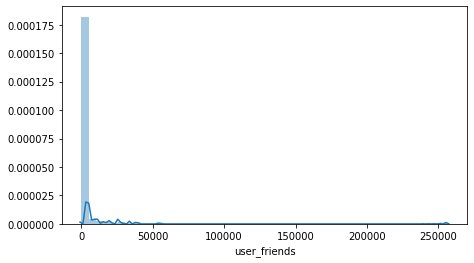

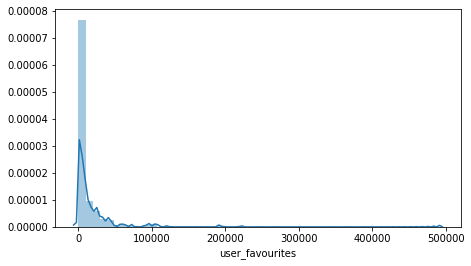

In [10]:
plotvariable(df,['user_followers', 'user_friends', 'user_favourites'])

In [13]:
dic_hl = {}
def get_boundary_value(list_c_ids):
    for list_c_id in list_c_ids:
        higher = df[list_c_id].mean() + 3*df[list_c_id].std()  
        print('Highest Allow',list_c_id,higher)
        lower = df[list_c_id].mean() - 3*df[list_c_id].std()
        print('Lowest Allow',list_c_id,lower)
        dic_hl[list_c_id] = [higher,lower]

In [14]:
get_boundary_value(['user_followers','user_friends','user_favourites'])
for k , v in dic_hl.items():
    if k == 'user_followers':
        user_followers23 = df[(df[k] > v[0]) | (df[k] < v[1])]
        print(k,len(user_followers23),v)
    elif k == 'user_friends':
        user_friends23 = df[(df[k] > v[0]) | (df[k] < v[1])]
        print(k,len(user_friends23),v)
    elif k == 'user_favourites':
        user_favourites23 = df[(df[k] > v[0]) | (df[k] < v[1])]
        print(k,len(user_favourites23),v)

Highest Allow user_followers 2217009.4673213637
Lowest Allow user_followers -2051307.0673213636
Highest Allow user_friends 40253.441566993046
Lowest Allow user_friends -35128.61756699305
Highest Allow user_favourites 106500.73008202063
Lowest Allow user_favourites -84041.11808202064
user_followers 2 [2217009.4673213637, -2051307.0673213636]
user_friends 2 [40253.441566993046, -35128.61756699305]
user_favourites 6 [106500.73008202063, -84041.11808202064]


In [15]:
user_followers23

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
S:no,,,,,,,,,,,,,
235,CGTN,"Beijing, China",#SeeTheDifference with CGTN as we bring you st...,2013-01-24 03:18:59,13892795,69,104,True,2020-07-25 12:20:00,#APEC reaffirms #COVID19 economic recovery pri...,"['APEC', 'COVID19']",TweetDeck,False
348,The Hindu,"Chennai, India",News feeds from India's National Newspaper,2009-02-13 06:04:24,6296857,201,144,True,2020-07-25 12:16:03,"Just in: 1,142 new #COVID19 cases were reporte...","['COVID19', 'Delhi']",TweetDeck,False


In [16]:
user_friends23

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
S:no,,,,,,,,,,,,,
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
367,ᴍɪᴄʜᴀᴇʟ ᴊ ꜱᴍɪᴛʜ - ᴘᴀɴɪᴄ ᴅɪꜱᴏʀᴅᴇʀ 411,Florida,Environmental Protection & Sustainability: reu...,2010-07-08 19:11:10,244514,256510,10140,False,2020-07-25 12:15:14,If only Trump cared as much about protecting a...,"['COVID19', 'Tracing', 'Pandemic', 'Tech']",Twitter Web App,False


In [17]:
user_favourites23

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
S:no,,,,,,,,,,,,,
36,harleyb,Deep Heart Texas,Inquisitive; Open minded but clear-eyed; Unapo...,2014-02-03 01:23:36,6156,5463,193090,False,2020-07-25 12:26:06,@NicoleKowalski5 @chrisdameanor19 I'm feeling ...,['COVID19'],Twitter for Android,False
41,Matthew McGee ⴵ 🌍🇪🇺🇬🇧🎭🎞📚,A UK I no longer recognise,"I am a man, and nothing human is alien to me. ...",2011-12-07 11:16:36,3113,3086,221545,False,2020-07-25 12:25:56,"Britain didn't understand #Covid19 for months,...",['Covid19'],Twitter for Android,False
115,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10874,7330,488878,False,2020-07-25 12:23:53,@bubbaprog 350 school employees exposed to #CO...,['COVID19'],Twitter for Android,False
144,Cesar H Hernandez,"Hanoi, Vietnam","Humanista Cristiano de izquierda. 💯% Humanist,...",2009-12-20 21:52:24,1334,726,190957,False,2020-07-25 12:23:04,@KGeorgieva @Lenin You're totally wrong. Ecuad...,"['Vietnam', 'covid19', 'coronavirus', 'ncov']",Twitter for Android,False
313,Cindie Vaccaro 🇺🇸⚜🇮🇱,"Texas, USA #BackTheBlue",Christian|Mom|Conservative|Military|#NavyMom|#...,2011-12-15 23:09:26,25890,27074,107015,False,2020-07-25 12:17:21,@ckkirsch1 Comments on @andrewcuomo's mishandl...,['COVID19'],Twitter for Android,False
368,Combative Firebrand,"North Shore, Boston","Journalist, Broadcaster, Policy Wonk, Educator...",2011-12-07 23:04:12,2729,4999,120801,False,2020-07-25 12:15:14,"@ggo0megaFAN @NikolovScience No, it is still a...","['Covid_19', 'COVID19']",Twitter for iPhone,False


# Trimming

In [18]:
#get_boundary_value(['user_followers','user_friends','user_favourites'])
for k , v in dic_hl.items():
    if k == 'user_followers':
        #this is our new data set 
        new_user_followers23 = df[(df[k] < v[0]) & (df[k] > v[1])]
        print(k,len(user_followers23),v)
    elif k == 'user_friends':
        new_user_friends23 = df[(df[k] < v[0]) & (df[k] > v[1])]
        print(k,len(user_friends23),v)
    elif k == 'user_favourites':
        new_user_favourites23 = df[(df[k] < v[0]) & (df[k] > v[1])]
        print(k,len(user_favourites23),v)

user_followers 2 [2217009.4673213637, -2051307.0673213636]
user_friends 2 [40253.441566993046, -35128.61756699305]
user_favourites 6 [106500.73008202063, -84041.11808202064]


In [19]:
new_user_followers23

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
S:no,,,,,,,,,,,,,
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,Zero,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Zero,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Coburg Consulting Group Ltd,"Nairobi, Kenya",Coburg Consulting Group (CCG) Limited was esta...,2020-06-23 05:23:23,118,143,40,False,2020-07-25 12:11:10,As Somalia heads to political campaign and lat...,['COVID19'],Twitter Web App,False
496,Judy Cheesey,"Nairobi, Kenya",Call it as I see it.,2017-05-14 09:47:53,250,187,956,False,2020-07-25 12:11:10,@jjauthor Can someone give this twirp and his ...,['COVID19'],Twitter for iPhone,False
497,Mauricio Ramirez Villegas,República Dominicana,Cuenta oficial del Representante de Naciones U...,2020-02-10 21:08:02,254,675,542,False,2020-07-25 12:11:08,The @UN is helping families use the opportunit...,['COVID19'],Twitter for iPhone,False


In [20]:
new_user_followers23

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
S:no,,,,,,,,,,,,,
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,Zero,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Zero,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Coburg Consulting Group Ltd,"Nairobi, Kenya",Coburg Consulting Group (CCG) Limited was esta...,2020-06-23 05:23:23,118,143,40,False,2020-07-25 12:11:10,As Somalia heads to political campaign and lat...,['COVID19'],Twitter Web App,False
496,Judy Cheesey,"Nairobi, Kenya",Call it as I see it.,2017-05-14 09:47:53,250,187,956,False,2020-07-25 12:11:10,@jjauthor Can someone give this twirp and his ...,['COVID19'],Twitter for iPhone,False
497,Mauricio Ramirez Villegas,República Dominicana,Cuenta oficial del Representante de Naciones U...,2020-02-10 21:08:02,254,675,542,False,2020-07-25 12:11:08,The @UN is helping families use the opportunit...,['COVID19'],Twitter for iPhone,False


In [21]:
new_user_favourites23

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
S:no,,,,,,,,,,,,,
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,Zero,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Zero,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Coburg Consulting Group Ltd,"Nairobi, Kenya",Coburg Consulting Group (CCG) Limited was esta...,2020-06-23 05:23:23,118,143,40,False,2020-07-25 12:11:10,As Somalia heads to political campaign and lat...,['COVID19'],Twitter Web App,False
496,Judy Cheesey,"Nairobi, Kenya",Call it as I see it.,2017-05-14 09:47:53,250,187,956,False,2020-07-25 12:11:10,@jjauthor Can someone give this twirp and his ...,['COVID19'],Twitter for iPhone,False
497,Mauricio Ramirez Villegas,República Dominicana,Cuenta oficial del Representante de Naciones U...,2020-02-10 21:08:02,254,675,542,False,2020-07-25 12:11:08,The @UN is helping families use the opportunit...,['COVID19'],Twitter for iPhone,False
